<a href="https://colab.research.google.com/github/Nahom32/GBLO/blob/main/notebooks/Gradient_Based_Learning_Variants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt


In [31]:
raw_train, raw_validation, raw_test= tfds.load(
    'malaria',
    split=['train[:80%]', 'train[80%:90%]','train[90%:]' ],  # The malaria dataset typically only has a 'train' split
    as_supervised=True,

)


In [32]:
def preprocess(image, label):
    image = tf.image.resize(image, (224, 224))  # image is a 3D tensor (H, W, C)
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0, 1]
    return image, label


In [33]:
train_ds = raw_train.map(preprocess).shuffle(buffer_size=1000).batch(32).prefetch(tf.data.AUTOTUNE)
validation_ds = raw_validation.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = raw_test.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)


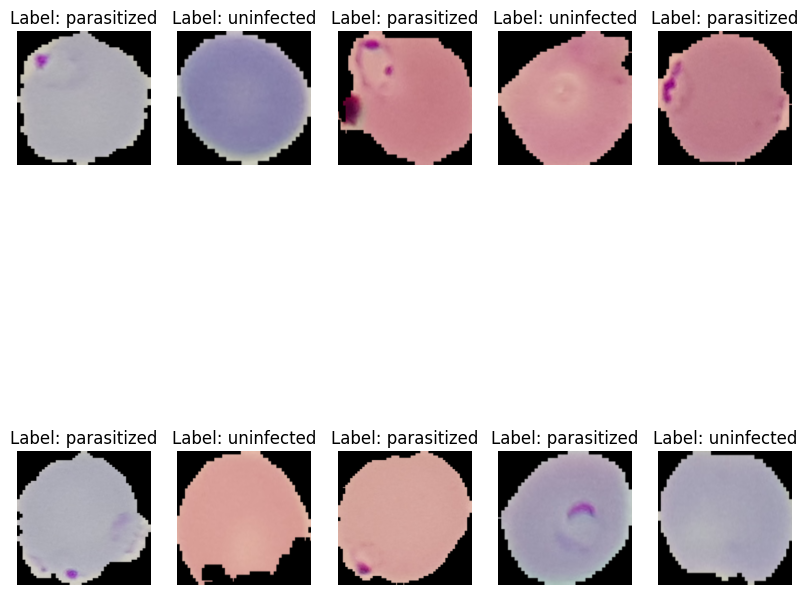

In [34]:
for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(min(10, images.shape[0])):
        ax = plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].numpy())

        # Get the label name from metadata
        label_name = metadata.features['label'].names[labels[i].numpy()]
        plt.title(f"Label: {label_name}")
        plt.axis("off")
    plt.show()